In [2]:
from PIL import Image
import os

def limpiar_carpeta(carpeta):
    for archivo in os.listdir(carpeta):
        ruta_archivo = os.path.join(carpeta, archivo)
        if os.path.isfile(ruta_archivo):
            os.remove(ruta_archivo)

def dividir_imagen(imagen, ancho_segmento, alto_segmento, carpeta_destino):
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)
    else:
        limpiar_carpeta(carpeta_destino)

    img = Image.open(imagen)
    ancho_total, alto_total = img.size

    contador = 1
    for y in range(0, alto_total, alto_segmento):
        for x in range(0, ancho_total, ancho_segmento):
            cuadro = (x, y, x + ancho_segmento, y + alto_segmento)
            segmento = img.crop(cuadro)
            segmento.save(os.path.join(carpeta_destino, f"segmento_{contador}.png"))
            contador += 1


imagen_original = "17.jpg"
ancho_segmento = 100
alto_segmento = 100
carpeta_destino = "segmentos"

dividir_imagen(imagen_original, ancho_segmento, alto_segmento, carpeta_destino)


In [3]:
# HOG


In [4]:
# SIFT

# Important NOTE:  Use opencv >=4.4 
import cv2
 
# Loading the image
img = cv2.imread('segmentos\segmento_21.png')
 
 # Converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
# Applying SIFT detector
sift = cv2.SIFT_create()
# kp = sift.detect(gray, None)
kp, des = sift.detectAndCompute(gray,None)
print(des)  #5120

# kp,des = sift.compute(gray,kp)
# print(kp,des)


# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
cv2.imwrite('image-with-keypoints.jpg', img)

[[ 4.  5. 55. ... 21.  5.  2.]
 [28. 35.  5. ... 10.  7. 38.]
 [15. 27. 10. ...  0.  0. 49.]
 ...
 [18. 10.  1. ...  4. 33.  7.]
 [79.  4. 11. ...  8. 13.  5.]
 [12. 18.  5. ...  0.  1. 20.]]


True

384


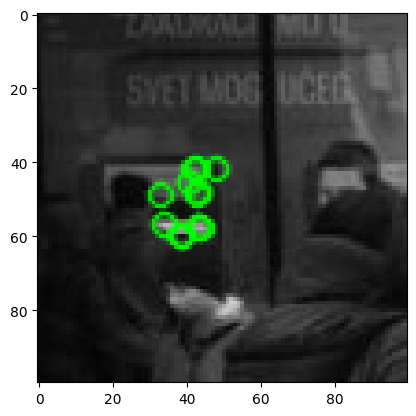

(<matplotlib.image.AxesImage at 0x28cf5b36110>, None)

In [5]:
# ORB
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('segmentos\segmento_21.png', cv.IMREAD_GRAYSCALE)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

print(des.size)     #576

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

Number of contours detected: 3

HuMoments for Contour 1:
 [[3.11386459e-01]
 [6.04324353e-02]
 [2.32620095e-03]
 [3.18878052e-04]
 [2.73757814e-07]
 [7.63192873e-05]
 [2.19696593e-08]]

HuMoments for Contour 2:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

HuMoments for Contour 3:
 [[ 2.50000000e-01]
 [ 3.47222222e-02]
 [ 1.27870232e-20]
 [ 1.12910671e-20]
 [ 1.28739962e-40]
 [ 1.21388324e-21]
 [-4.28095519e-41]]


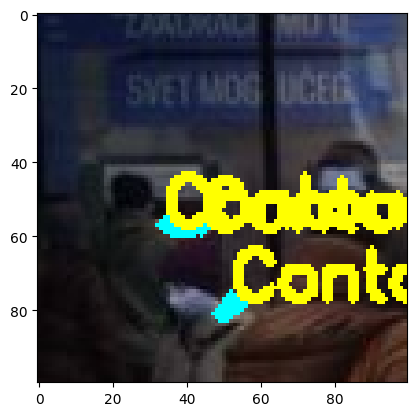

(<matplotlib.image.AxesImage at 0x28c8854ec50>, None)

In [7]:
# Momentos de HUGH

import cv2
import numpy as np

img = cv2.imread('segmentos\segmento_21.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,170,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:",len(contours))

# compute HuMoments for all the contours detected in the image
for i, cnt in enumerate(contours):
   x,y = cnt[0,0]
   moments = cv2.moments(cnt)
   hm = cv2.HuMoments(moments)
   cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
   cv2.putText(img, f'Contour {i+1}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
   print(f"\nHuMoments for Contour {i+1}:\n", hm)   # 27

plt.imshow(img), plt.show()
